In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [4]:
# Loading the dataset
data = pd.read_csv("data/gld_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
len(data)

2290

In [6]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
data.shape

(2290, 6)

In [8]:
# getting some basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# Checking the missing values
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting the statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation

In [14]:
corr = data.corr(numeric_only = True)

In [15]:
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


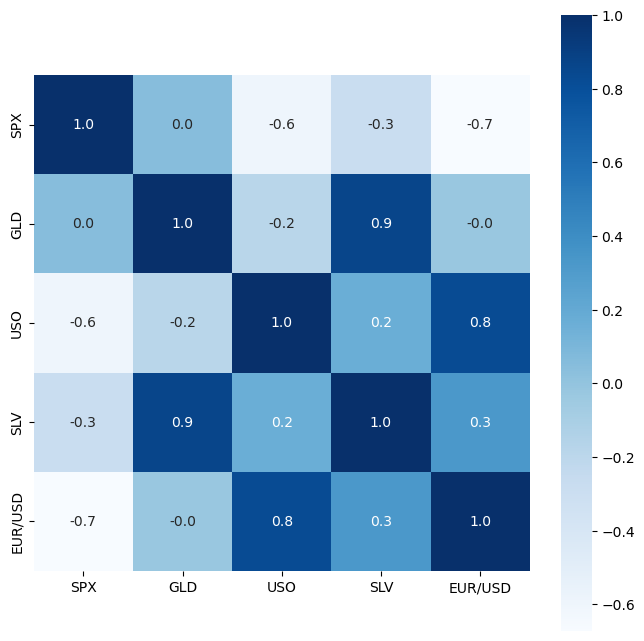

In [22]:
# constructiong a heatmap 
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cbar=True, square=True, cmap="Blues", annot=True, fmt=".1f");

In [23]:
corr["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

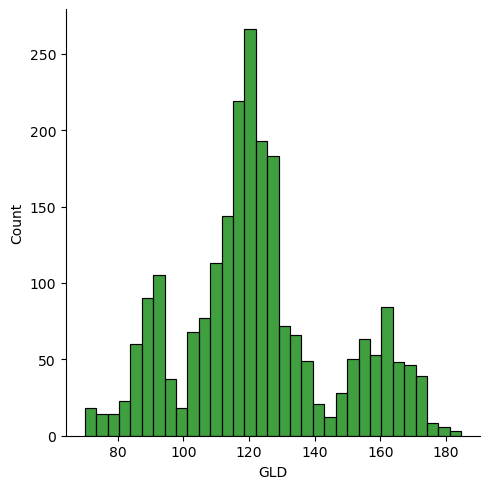

In [25]:
# Checking the distribution of the GLD price
sns.displot(data["GLD"], color='green');

In [26]:
data['Year'] = pd.to_datetime(data['Date'], format='%m/%d/%Y').dt.year

In [27]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692,2008
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491,2008
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492,2008
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299,2008
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099,2008
...,...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789,2018
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722,2018
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753,2018
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118,2018


In [31]:
data.drop("Date",axis= 1, inplace= True)

In [32]:
data

,SPX,GLD,USO,SLV,EUR/USD,Year
0,1447.160034,84.860001,78.470001,15.1800,1.471692,2008
1,1447.160034,85.570000,78.370003,15.2850,1.474491,2008
2,1411.630005,85.129997,77.309998,15.1670,1.475492,2008
3,1416.180054,84.769997,75.500000,15.0530,1.468299,2008
4,1390.189941,86.779999,76.059998,15.5900,1.557099,2008
...,...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789,2018
2286,2697.790039,124.330002,14.370000,15.5300,1.184722,2018
2287,2723.070068,125.180000,14.410000,15.7400,1.191753,2018
2288,2730.129883,124.489998,14.380000,15.5600,1.193118,2018


## Splitting the Features and the target

In [33]:
X = data.drop("GLD", axis= 1)
y = data["GLD"]

In [34]:
X

,SPX,USO,SLV,EUR/USD,Year
0,1447.160034,78.470001,15.1800,1.471692,2008
1,1447.160034,78.370003,15.2850,1.474491,2008
2,1411.630005,77.309998,15.1670,1.475492,2008
3,1416.180054,75.500000,15.0530,1.468299,2008
4,1390.189941,76.059998,15.5900,1.557099,2008
...,...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789,2018
2286,2697.790039,14.370000,15.5300,1.184722,2018
2287,2723.070068,14.410000,15.7400,1.191753,2018
2288,2730.129883,14.380000,15.5600,1.193118,2018


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Handling outliers

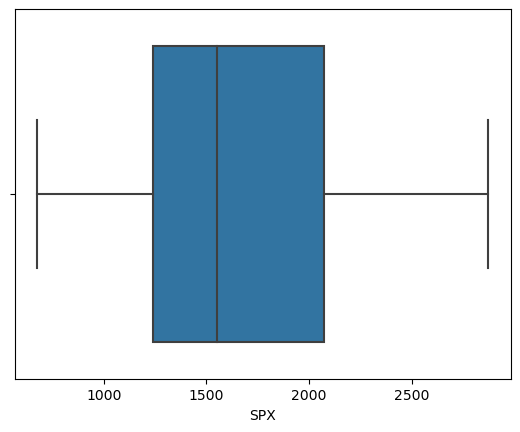

In [65]:
sns.boxplot(x=data["SPX"]);

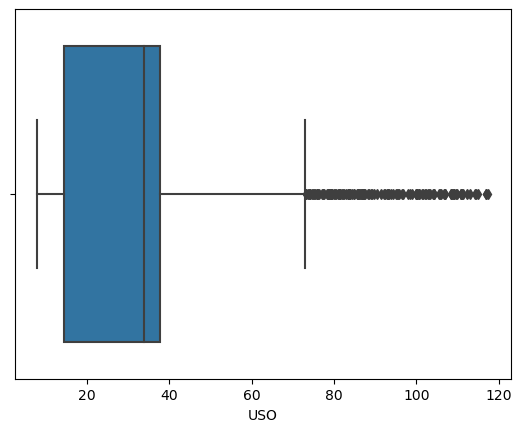

In [66]:
sns.boxplot(x=data["USO"]);

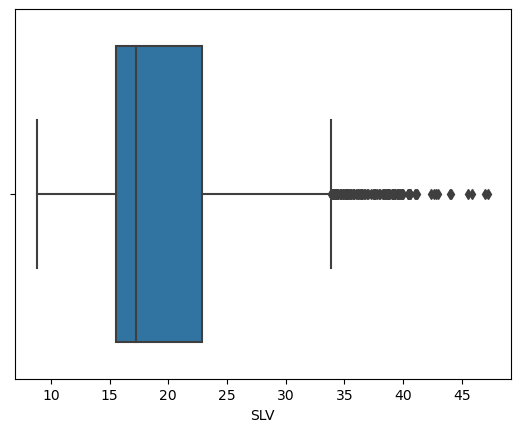

In [67]:
sns.boxplot(x=data["SLV"]);

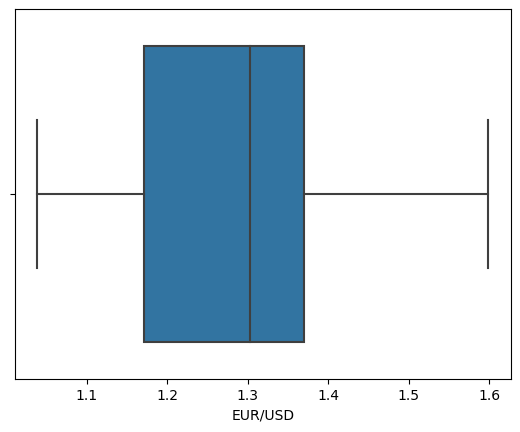

In [68]:
sns.boxplot(x=data["EUR/USD"]);

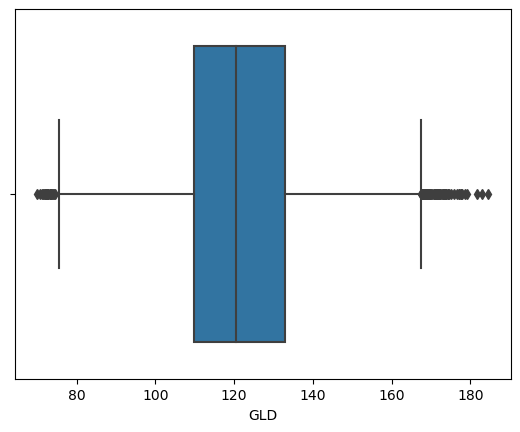

In [69]:
sns.boxplot(x=data["GLD"]);

In [70]:
from scipy import stats

# Assume that `data` is a NumPy array containing some data
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_data = data[filtered_entries]

In [71]:
len(new_data)

2217

In [73]:
X = new_data.drop("GLD", axis= 1)
y = new_data["GLD"]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

scaled_y_train = sc.fit_transform(np.array(y_train).reshape(-1, 1))
scaled_y_test = sc.transform(np.array(y_test).reshape(-1, 1))


# Model Training

In [76]:
model = RandomForestRegressor()

model.fit(scaled_x_train, scaled_y_train)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1260\2617719799.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(scaled_x_train, scaled_y_train)


RandomForestRegressor()

In [77]:
model.score(scaled_x_test, scaled_y_test)

0.9940403840501147

## Evaluation

In [78]:
predicated_data = model.predict(scaled_x_test)

In [81]:
original_data = sc.inverse_transform(predicated_data.reshape(-1, 1))

In [82]:
original_data

array([[160.74989995],
       [ 87.49719758],
       [155.05220012],
       [109.85879828],
       [120.48180053],
       [128.34499892],
       [114.33259888],
       [102.60859922],
       [165.50330178],
       [167.97290018],
       [118.72799938],
       [116.56009875],
       [112.34440017],
       [118.42530168],
       [ 93.04420026],
       [167.93189892],
       [118.46949766],
       [110.92850004],
       [119.99060047],
       [129.40169963],
       [166.24230005],
       [161.00370119],
       [117.47219937],
       [160.41869847],
       [153.83610092],
       [122.33319974],
       [120.02130019],
       [128.5768998 ],
       [130.98330247],
       [166.18259985],
       [103.24109984],
       [120.40670043],
       [125.4125981 ],
       [125.7838004 ],
       [ 76.7430002 ],
       [121.47729998],
       [ 89.5763989 ],
       [119.63790042],
       [144.6548989 ],
       [113.63870042],
       [117.17080075],
       [ 89.88560035],
       [102.00799991],
       [111

In [84]:
# R squared error
error_score = metrics.r2_score(scaled_y_test, predicated_data)
error_score

0.9940403840501147